In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load data into a Pandas DataFrame
data = pd.read_csv('/content/starbucks_drinkMenu_expanded.csv')

In [ ]:
# review the dataset
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [ ]:
data.shape

(242, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

## **DATA CLEANING**




In [ ]:
#Remove the duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.shape


(242, 18)

In [ ]:
# check null values
data.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [ ]:
# standerdize the column names
def standardize_column_names(df):
  # replace spaces with underscores and convert to lowercase
  df.columns = df.columns.str.replace(" ", "_")
  df.columns = df.columns.str.lower().str.strip("_")
  # remove parentheses and replace % with percent
  df.columns = df.columns.str.replace(r'\(|\)', '').str.replace("%", "percent")
  return df

In [ ]:
data = standardize_column_names(data)

<ipython-input-7-28adca9fbe8d>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'\(|\)', '').str.replace("%", "percent")


In [ ]:
# remove "%" in some columns and convert it to numeric
def clean_percentage_value(df,column_indices):
  for column_index in column_indices:
    column_name = df.columns[column_index]
    df[column_name] = df[column_name].astype(str).str.strip("%")
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype(float)
  return df

In [ ]:
percentage_column_indices = [13,14,15,16]
clean_percentage_value(data, percentage_column_indices)

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a_percent_dv,vitamin_c_percent_dv,calcium_percent_dv,iron_percent_dv,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6.0,8.0,20.0,10.0,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6.0,0.0,10.0,0.0,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6.0,0.0,10.0,0.0,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4.0,0.0,10.0,6.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   beverage_category      242 non-null    object 
 1   beverage               242 non-null    object 
 2   beverage_prep          242 non-null    object 
 3   calories               242 non-null    int64  
 4   total_fat_g            242 non-null    object 
 5   trans_fat_g            242 non-null    float64
 6   saturated_fat_g        242 non-null    float64
 7   sodium_mg              242 non-null    int64  
 8   total_carbohydrates_g  242 non-null    int64  
 9   cholesterol_mg         242 non-null    int64  
 10  dietary_fibre_g        242 non-null    int64  
 11  sugars_g               242 non-null    int64  
 12  protein_g              242 non-null    float64
 13  vitamin_a_percent_dv   242 non-null    float64
 14  vitamin_c_percent_dv   242 non-null    float64
 15  calciu

In [ ]:
# Convert the type of total_fat_g columns to numeric
data['total_fat_g'] = pd.to_numeric(data['total_fat_g'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   beverage_category      242 non-null    object 
 1   beverage               242 non-null    object 
 2   beverage_prep          242 non-null    object 
 3   calories               242 non-null    int64  
 4   total_fat_g            241 non-null    float64
 5   trans_fat_g            242 non-null    float64
 6   saturated_fat_g        242 non-null    float64
 7   sodium_mg              242 non-null    int64  
 8   total_carbohydrates_g  242 non-null    int64  
 9   cholesterol_mg         242 non-null    int64  
 10  dietary_fibre_g        242 non-null    int64  
 11  sugars_g               242 non-null    int64  
 12  protein_g              242 non-null    float64
 13  vitamin_a_percent_dv   242 non-null    float64
 14  vitamin_c_percent_dv   242 non-null    float64
 15  calciu

In [ ]:
# replace null value in "total_fat_g" columns by mean value
mean_value_total_fat = data['total_fat_g'].mean()
data['total_fat_g'].fillna(mean_value_total_fat, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   beverage_category      242 non-null    object 
 1   beverage               242 non-null    object 
 2   beverage_prep          242 non-null    object 
 3   calories               242 non-null    int64  
 4   total_fat_g            242 non-null    float64
 5   trans_fat_g            242 non-null    float64
 6   saturated_fat_g        242 non-null    float64
 7   sodium_mg              242 non-null    int64  
 8   total_carbohydrates_g  242 non-null    int64  
 9   cholesterol_mg         242 non-null    int64  
 10  dietary_fibre_g        242 non-null    int64  
 11  sugars_g               242 non-null    int64  
 12  protein_g              242 non-null    float64
 13  vitamin_a_percent_dv   242 non-null    float64
 14  vitamin_c_percent_dv   242 non-null    float64
 15  calciu

# **DATA ANALYZING**

In [ ]:
# list of category
data['beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

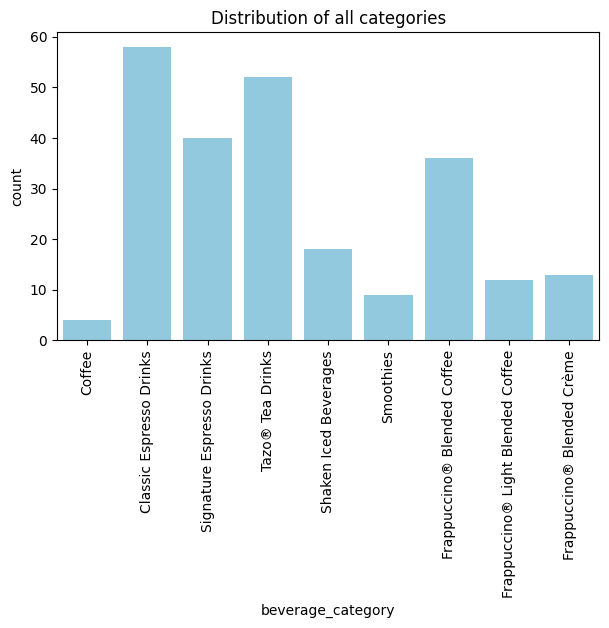

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=data, x='beverage_category', color='skyblue').set_title('Distribution of all categories')
plt.xticks(rotation=90)
plt.show()



In [ ]:
# Drinks in every category
drinks = data.groupby('beverage_category')['beverage'].value_counts()
drinks

beverage_category                  beverage                                           
Classic Espresso Drinks            Caffè Latte                                            12
                                   Caffè Mocha (Without Whipped Cream)                    12
                                   Cappuccino                                             12
                                   Vanilla Latte (Or Other Flavoured Latte)               12
                                   Caffè Americano                                         4
                                   Skinny Latte (Any Flavour)                              4
                                   Espresso                                                2
Coffee                             Brewed Coffee                                           4
Frappuccino® Blended Coffee        Caramel (Without Whipped Cream)                         9
                                   Coffee                                   

In [ ]:
# the number of drinks at starbuck
drinks.value_counts().sum()

34

In [ ]:
# Group the data by "beverage_category" and calculate mean values for numeric columns
mean_data_by_cate = data.groupby('beverage_category').mean(numeric_only=True)
mean_data_by_cate

,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a_percent_dv,vitamin_c_percent_dv,calcium_percent_dv,iron_percent_dv
beverage_category,,,,,,,,,,,,,,
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207,12.724138,0.206897,27.344828,8.103448
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.500000,0.000000
Frappuccino® Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222,5.500000,0.000000,12.277778,10.861111
Frappuccino® Blended Crème,233.076923,1.931056,0.769231,0.038462,4.230769,188.846154,49.923077,0.307692,48.461538,4.000000,6.153846,4.615385,13.846154,3.846154
Frappuccino® Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000,6.000000,0.000000,11.333333,9.000000
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444,1.777778,2.500000,4.000000,0.666667
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000,13.150000,0.750000,31.375000,10.550000
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111,20.444444,65.000000,13.333333,11.777778
Tazo® Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692,10.557692,2.903846,23.653846,4.673077


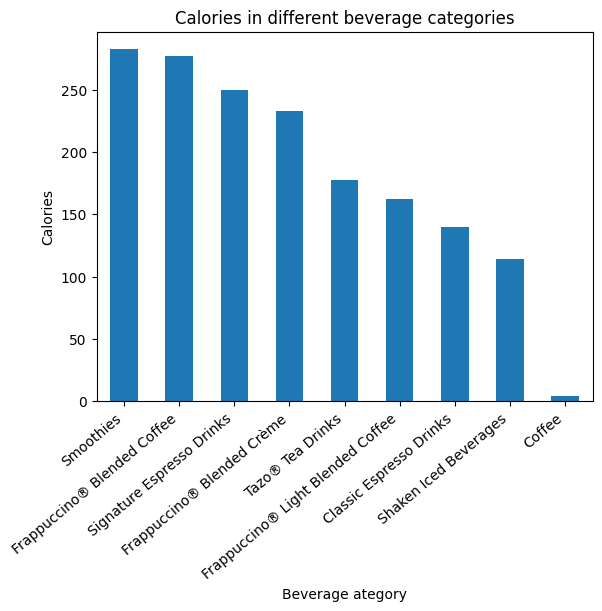

In [ ]:
# which category has the highest calories from the dataset?
sorted_calories = mean_data_by_cate[['calories']].sort_values(by='calories', ascending=False)
sorted_calories.plot(kind='bar', y='calories', legend=False)
plt.title('Calories in different beverage categories')
plt.xlabel('Beverage ategory')
plt.xticks(rotation=40, ha='right')
plt.ylabel('Calories')
plt.show()

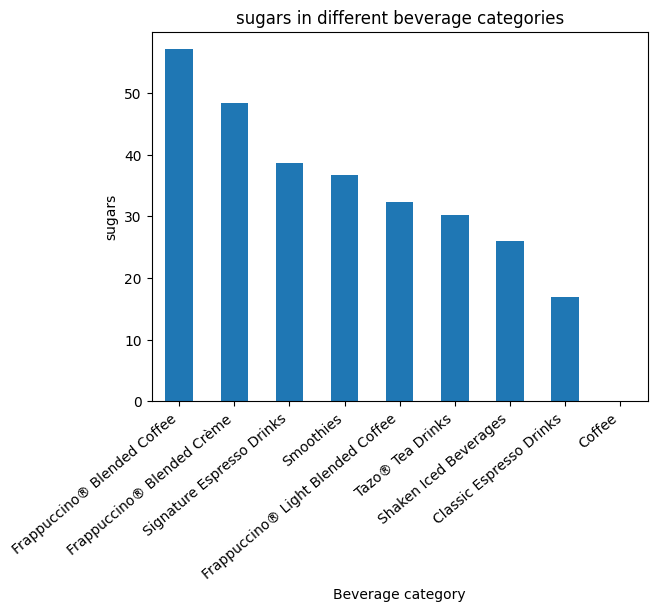

In [ ]:
# which category has the highest sugar from the dataset?
sorted_sugar = mean_data_by_cate[['sugars_g']].sort_values(by='sugars_g', ascending=False)
sorted_sugar.plot(kind='bar', y='sugars_g', legend=False)
plt.title('sugars in different beverage categories')
plt.xlabel('Beverage category')
plt.xticks(rotation=40, ha='right')
plt.ylabel('sugars')
plt.show()

In [ ]:
# The number of beverage prep in the list
data['beverage_prep'].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [ ]:
# Group the data by "beverage_prep" and calculate mean values for numeric columns
mean_data_by_prep = data.groupby('beverage_prep').mean(numeric_only=True)
mean_data_by_prep

,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a_percent_dv,vitamin_c_percent_dv,calcium_percent_dv,iron_percent_dv
beverage_prep,,,,,,,,,,,,,,
2% Milk,218.000000,5.520000,2.920000,0.14400,19.600000,126.300000,34.100000,0.720000,30.980000,9.620000,13.840000,5.560000,27.080000,4.560000
Doppio,10.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Grande,85.714286,0.028571,0.000000,0.00000,0.000000,7.142857,21.142857,0.000000,20.000000,0.342857,0.000000,2.142857,0.285714,0.000000
Grande Nonfat Milk,209.615385,1.134615,0.746154,0.00000,3.653846,161.730769,42.653846,1.192308,38.615385,8.807692,13.730769,8.384615,21.846154,6.615385
Short,37.000000,0.025000,0.000000,0.00000,0.000000,5.000000,9.000000,0.000000,8.250000,0.175000,0.000000,0.000000,0.000000,0.000000
Short Nonfat Milk,99.166667,0.658333,0.441667,0.00000,3.750000,69.166667,18.416667,0.166667,17.000000,5.750000,8.666667,0.333333,16.666667,1.833333
Solo,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000
Soymilk,207.272727,4.059147,1.006061,0.00000,0.454545,129.242424,36.333333,1.500000,31.848485,7.121212,8.575758,4.090909,24.151515,14.606061
Tall,63.428571,0.014286,0.000000,0.00000,0.000000,5.571429,15.714286,0.000000,14.714286,0.257143,0.000000,1.428571,0.285714,0.857143


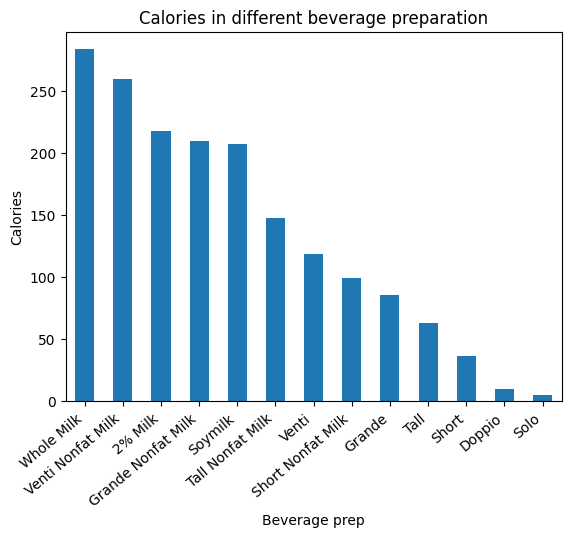

In [ ]:
#  which beverage prepration has the highest calories from the dataset?
sorted_calories = mean_data_by_prep[['calories']].sort_values(by='calories', ascending=False)
sorted_calories.plot(kind='bar', y='calories', legend=False,)
plt.title('Calories in different beverage preparation')
plt.xlabel('Beverage prep')
plt.xticks(rotation=40, ha='right')
plt.ylabel('Calories')
plt.show()

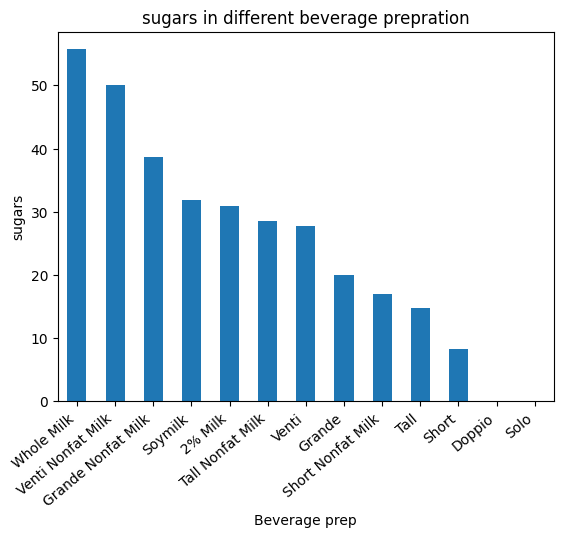

In [ ]:
# which beverage prep has the highest sugar from the dataset?
sorted_sugar = mean_data_by_prep[['sugars_g']].sort_values(by='sugars_g', ascending=False)
sorted_sugar.plot(kind='bar', y='sugars_g', legend=False)
plt.title('sugars in different beverage prepration')
plt.xlabel('Beverage prep')
plt.xticks(rotation=40, ha='right')
plt.ylabel('sugars')
plt.show()

<ipython-input-17-6324fa6ffdf4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrplot = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot")


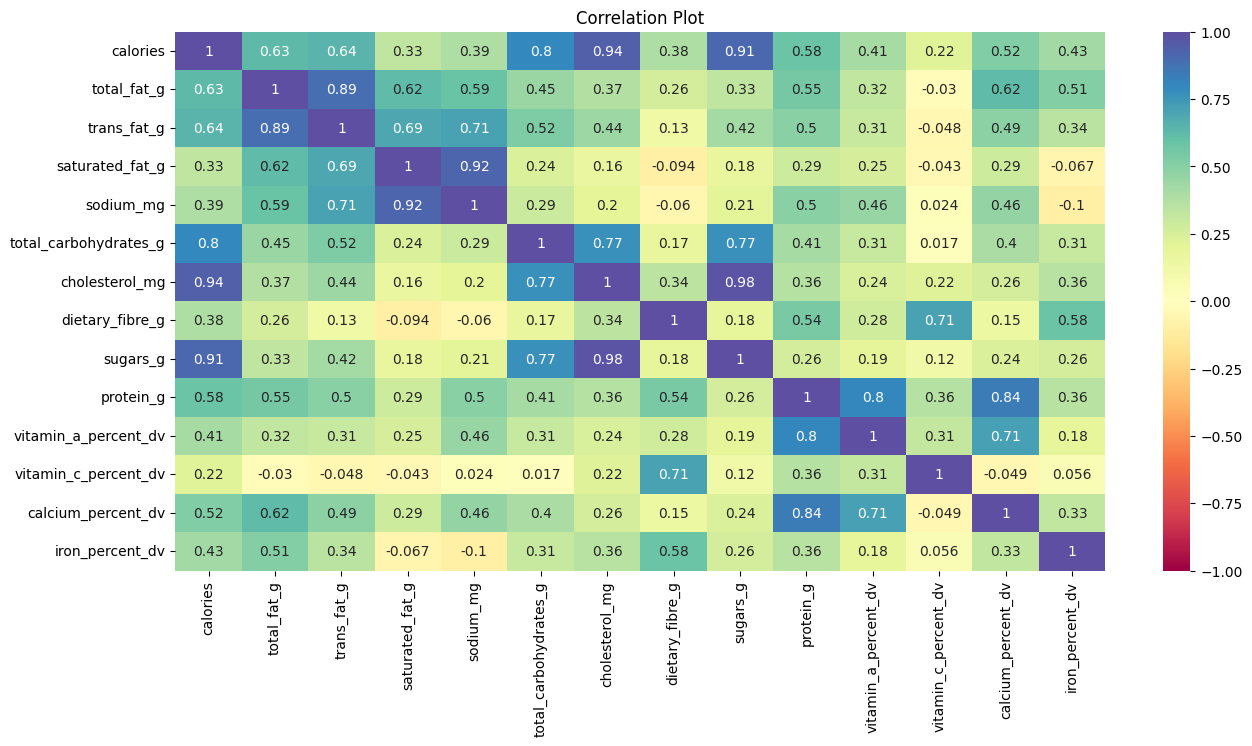

In [ ]:
#Person correlation
plt.figure(figsize=(15, 7))
corrplot = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot")
plt.show()

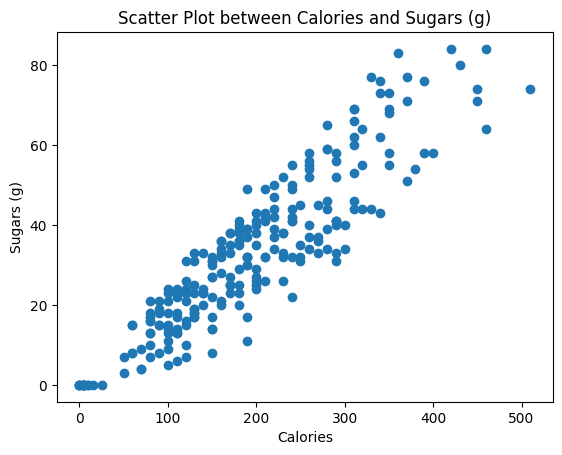

In [ ]:
# 1. Relationship between calories vs sugars
plt.scatter(data['calories'], data['sugars_g'])
plt.title('Scatter Plot between Calories and Sugars (g)')
plt.xlabel('Calories')
plt.ylabel('Sugars (g)')
plt.show()

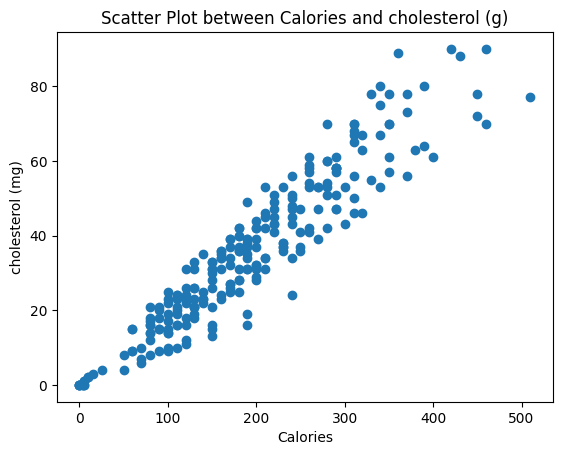

In [ ]:
# 3. Relationship between calories vs cholesterol(g)
plt.scatter(data['calories'], data['cholesterol_mg'])
plt.title('Scatter Plot between Calories and cholesterol (g)')
plt.xlabel('Calories')
plt.ylabel('cholesterol (mg)')
plt.show()

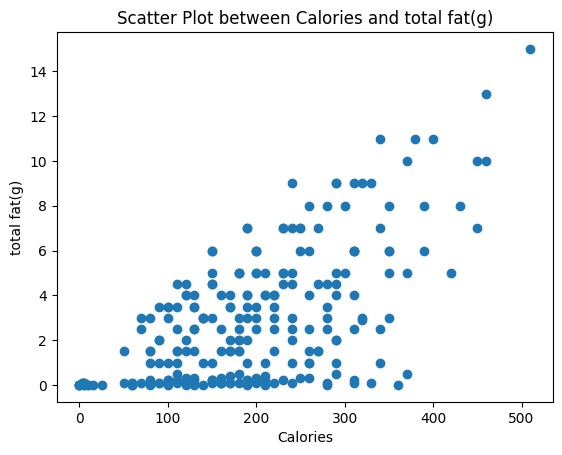

In [ ]:
# 1. Relationship between calories vs total_fat
plt.scatter(data['calories'], data['total_fat_g'])
plt.title('Scatter Plot between Calories and total fat(g)')
plt.xlabel('Calories')
plt.ylabel('total fat(g)')
plt.show()

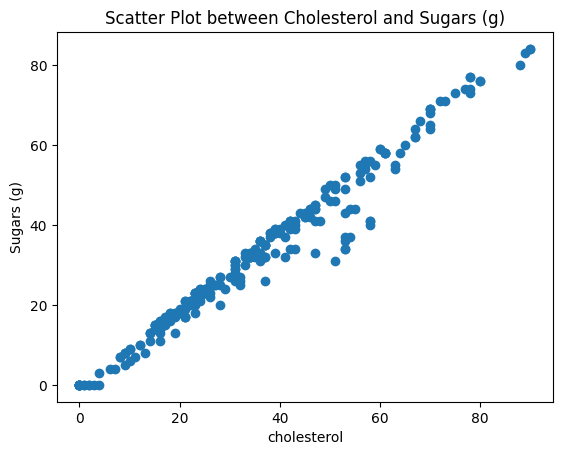

In [ ]:
# 1. Relationship between cholesterol vs sugars
plt.scatter(data['cholesterol_mg'], data['sugars_g'])
plt.title('Scatter Plot between Cholesterol and Sugars (g)')
plt.xlabel('cholesterol')
plt.ylabel('Sugars (g)')
plt.show()

In [ ]:
# 1. Relationship between cholesterol vs sugars
plt.scatter(data['cholesterol_mg'], data['sugars_g'])
plt.title('Scatter Plot between Cholesterol and Sugars (g)')
plt.xlabel('cholesterol')
plt.ylabel('Sugars (g)')
plt.show()

In [ ]:
data.head()

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a_percent_dv,vitamin_c_percent_dv,calcium_percent_dv,iron_percent_dv,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75


In [ ]:
min_calories = data['calories'].min()
max_calories = data['calories'].max()
print(f"Highest calories: {min_calories}\nLowest calories: {max_calories}")

Highest calories: 0
Lowest calories: 510


Divide calories range into three smaller range.

**Level 1**: 0-179 **level 2**: 180-359 **level 3**: 360-540




In [ ]:
from tabulate import tabulate

# Calories ranges
calories_bins = [0, 179, 359, 540]
calories_labels = ['Low(0-179)', 'Moderate(180-359)', 'High(360-540)']

# Create dictionary for each range
calories_levels_dict = {label: [] for label in calories_labels}

# Iterate through each row
for index, row in data.iterrows():
    beverage_category = row['beverage_category']
    beverage = row['beverage']
    beverage_prep = row['beverage_prep']
    calories = row['calories']
     # Iterate through defined calorie bins and check the range
    for label, bin_range in zip(calories_labels, zip(calories_bins, calories_bins[1:])):
        if bin_range[0] <= calories < bin_range[1]:
            calories_levels_dict[label].append({'beverage_category': beverage_category,
                                                'beverage': beverage,
                                                'beverage_prep': beverage_prep,
                                                'calories': calories})

# print the result
for label in calories_labels:
    df_level = pd.DataFrame(calories_levels_dict[label])
    print(f"\nCalories Level: {label}")
    print(tabulate(df_level, headers='keys', tablefmt='pretty'))



Calories Level: Low(0-179)
+-----+-----------------------------------+-----------------------------------------------------+--------------------+----------+
|     |         beverage_category         |                      beverage                       |   beverage_prep    | calories |
+-----+-----------------------------------+-----------------------------------------------------+--------------------+----------+
|  0  |              Coffee               |                    Brewed Coffee                    |       Short        |    3     |
|  1  |              Coffee               |                    Brewed Coffee                    |        Tall        |    4     |
|  2  |              Coffee               |                    Brewed Coffee                    |       Grande       |    5     |
|  3  |              Coffee               |                    Brewed Coffee                    |       Venti        |    5     |
|  4  |      Classic Espresso Drinks      |                   